<a href="https://colab.research.google.com/github/sgsoul/aptechka/blob/main/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D1%80%D0%B0%D0%B4%D1%83%D0%B3%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Моделирование явления радуги**

## Теоретическая часть
Радуга наблюдается как красочное явление природы, которое проявляется чаще всего в виде полудуги на фоне завесы дождя. Это явление было объяснено Декартом (1635), Ньютоном (1729), а полная теория дана Эри (1836) и Пертнером (1897). Явление радуги заключается в дисперсии света за счет отражения солнечных лучей на каплях воды. 

## Задачи проекта
Задача данной работы заключается в теоретическом рассмотрении этого явления и моделирования условий наблюдения радуги.

## Построение математической модели
 
Пусть солнечный луч падает горизонтально на каплю дождя. Отражение солнечных лучей от внутренней стороны капли может произойти двояким способом (см рис)

Здесь $α_1$- угол падения, $α_2$ – угол преломления. Из геометрических соображений следует, что угол, вышедшего луча по отношению к падающему лучу, для первого случая равен $ϕ_1= 4α_2 − 2α_1$. Для второго случая $ϕ_2= π − 6α_2 + 2 α_1$, причем согласно закону преломления, $sinα_2=sinα_1/2$, где $n$ – показатель преломления. 

Считая радиус капли равным единице, для первого и второго случая получим $sinα_1 =y, sinα_2=y/n, sinα_1=-y, sinα_2=-y/n$. Тогда  $ϕ_1=4arcsin(y/n)-2arcsin(y), y>0$. 


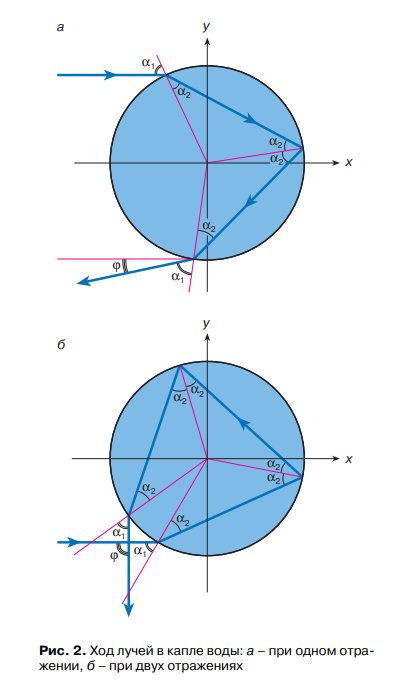

Потсроим графики углов $ϕ_1$ и $ϕ_2$ как функцию от y для показателя преломдения n=1.331 (красный цвет) и n=1.343 (фиолетовый цвет). Определим максимумы и минимумы углов $ϕ_1$ и $ϕ_2$ соответсвенно.

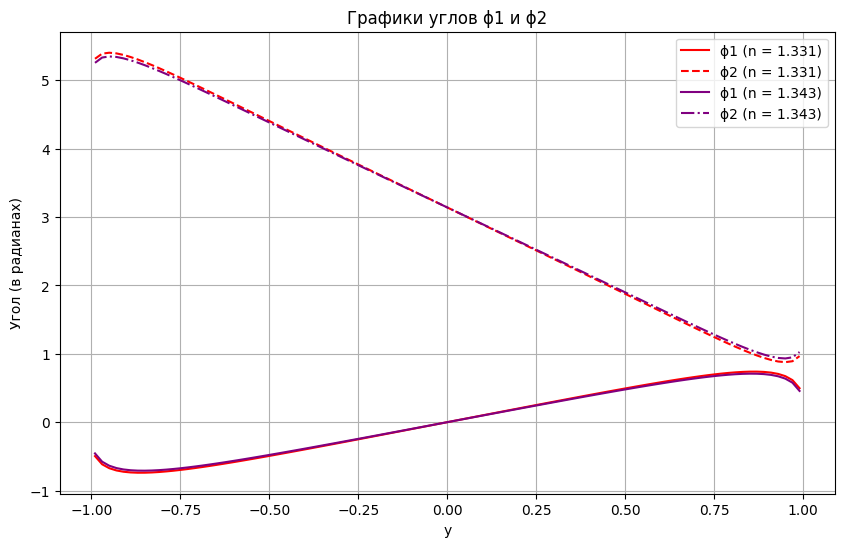

Максимум ϕ1 (красный): 42.35048926515861 
Минимум ϕ2 (красный): 50.27455398343972
Максимум ϕ1 (фиолетовый): 40.63780927235823
Минимум ϕ2 (фиолетовый): 53.390458447062215


In [15]:
import numpy as np
import matplotlib.pyplot as plt

ra2deg = 57.296

def calculate_phi1(n, u):
    phi = 4 * np.arcsin(u / n) - 2 * np.arcsin(u)
    return phi
  
def calculate_phi2(n, u):
    phi = 3.14 - 6 * np.arcsin(-u / n) + 2 * np.arcsin(-u)
    return phi

# Заданные значения показателей преломления
n_red = 1.331
n_violet = 1.343

# Заданный интервал изменения у
u = np.linspace(-0.99, 0.99, 100)

# Вычисление углов ϕ1 и ϕ2 для красного и фиолетового цветов
phi1_red = calculate_phi1(n_red, u)
phi2_red = calculate_phi2(n_red, -u)
phi1_violet = calculate_phi1(n_violet, u)
phi2_violet = calculate_phi2(n_violet, -u)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(u, phi1_red, 'r', label='ϕ1 (n = 1.331)')
plt.plot(u, phi2_red, 'r--', label='ϕ2 (n = 1.331)')
plt.plot(u, phi1_violet, 'purple', label='ϕ1 (n = 1.343)')
plt.plot(u, phi2_violet, 'purple', linestyle = 'dashdot', label='ϕ2 (n = 1.343)')
plt.xlabel('у')
plt.ylabel('Угол (в радианах)')
plt.title('Графики углов ϕ1 и ϕ2')
plt.legend()
plt.grid(True)
plt.show()

# Определение максимума ϕ1 и минимума ϕ2
max_phi1_red = np.max(phi1_red)
min_phi2_red = np.min(phi2_red)
max_phi1_violet = np.max(phi1_violet)
min_phi2_violet = np.min(phi2_violet)

print(f"Максимум ϕ1 (красный): {max_phi1_red * ra2deg} ")
print(f"Минимум ϕ2 (красный): {min_phi2_red * ra2deg}")
print(f"Максимум ϕ1 (фиолетовый): {max_phi1_violet * ra2deg}")
print(f"Минимум ϕ2 (фиолетовый): {min_phi2_violet * ra2deg}")

## Расчет интенсивонсти
Солнечные лучи, падая на завесу дождя, преломляются на каплях воды. Нижняя радуга обусловлена процессами рассеяния с одним отражением (см рис.), а верхняя – с двумя отражениями. Причем, фиолетовые лучи являются внешними, а красные – внутренними. Другие света размещаются между ними в соответствии со значениями показателей преломления. При наблюдении радуги Солнце не должно стоять слишком высоко над горизонтом – не более чем на угол $53^0 46'$. Отметим, что имеется угловой диаметр Солнца, равное $0.5^0$ , т.е. солнечные лучи не параллельны. Это влияет на контрастность цветов радуги.

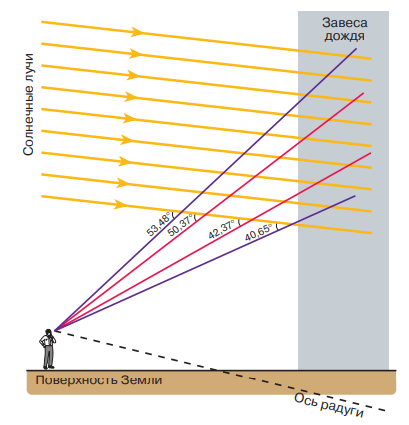

Величина $∆y$ пропорциональна изменению интенсивности света, эта же интенсивность света рассеивается каплей в угловом интервале $∆ϕ. ∆I ≈ ∆y =∆ϕ ctgβ$ где $β$ - угол, который касательная к графику в данной точке образует с осью абсцисс (см рис.). Интенсивность рассеянного каплей света, приходящаяся на единицу угла рассеяния $I(ϕ) = ∆I/∆ϕ ∼ ctgβ$ В экстремальных точках $ctgβ = ∞$, т.е. в экстремальных точках интенсивность максимальна. Положения этих экстремальных точек для различных цветов несколько отличаются, что и позволяет наблюдать радугу.

Построим графики интенсивности $I(ϕ)$ от угла падения солнечных лучей $ϕ$:

<ipython-input-32-7479bf103b09>:7: RuntimeWarning: invalid value encountered in arcsin
  phi1 = 4 * np.arcsin(y / n) - 2 * np.arcsin(y)
<ipython-input-32-7479bf103b09>:11: RuntimeWarning: invalid value encountered in arcsin
  phi2 = np.pi + 6 * np.arcsin(y / n) - 2 * np.arcsin(y)


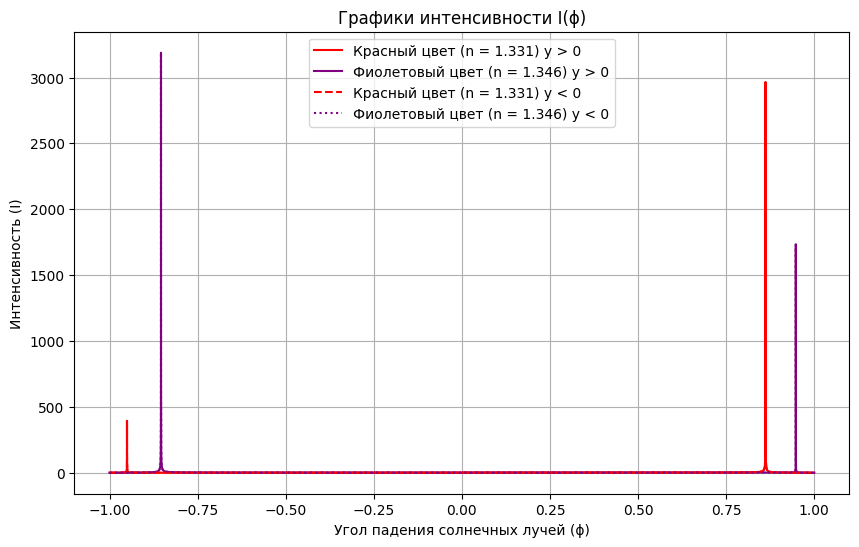

In [32]:
import numpy as np
import matplotlib.pyplot as plt

ra2deg = 57.296

def calculate_phi1(n, y):
    phi1 = 4 * np.arcsin(y / n) - 2 * np.arcsin(y)
    return phi1

def calculate_phi2(n, y):
    phi2 = np.pi + 6 * np.arcsin(y / n) - 2 * np.arcsin(y)
    return phi2

def calculate_intensity(n, y):
    phi1 = calculate_phi1(n, y)
    phi2 = calculate_phi2(n, y)
    d_phi1_dy = np.gradient(phi1, y)
    d_phi2_dy = np.gradient(phi2, y)
    intensity = 1 / np.abs(d_phi1_dy)
    intensity = np.where(y < 0, 1 / np.abs(d_phi2_dy), intensity)
    return intensity

# Исходные данные
n_red = 1.331
n_violet = 1.346
y = np.arange(-1.0001, 1.0001, 0.0001)

# Вычисление интенсивности для красного и фиолетового цветов
intensity_red1 = calculate_intensity(n_red, y)
intensity_violet1 = calculate_intensity(n_violet, -y)
intensity_red2 = calculate_intensity(n_red, y)
intensity_violet2 = calculate_intensity(n_violet, -y)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(y, intensity_red1, 'r', label='Красный цвет (n = 1.331) y > 0')
plt.plot(y, intensity_violet1, 'purple', label='Фиолетовый цвет (n = 1.346) y > 0')
plt.plot(y, intensity_red2, 'r--', label='Красный цвет (n = 1.331) y < 0')
plt.plot(y, intensity_violet2, 'purple', linestyle='dotted', label='Фиолетовый цвет (n = 1.346) y < 0')
plt.xlabel('Угол падения солнечных лучей (ϕ)')
plt.ylabel('Интенсивность (I)')
plt.title('Графики интенсивности I(ϕ)')
plt.legend()
plt.grid(True)
plt.show()


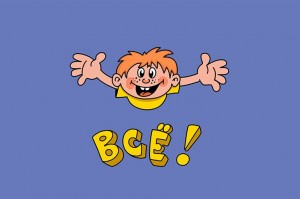